In [19]:
import pandas as pd
import numpy as np
print("chargés")

chargés


In [20]:
df_features_info =pd.read_csv(r"C:\Users\DELL\supplychain\python\src\Actuals_preprocess_py_info.csv")
df_features_info.head()

,dates,loc_id,prd_id,actuals_qty,prd_price,currency_id,actuals_sales,sales_forecast,currency_desc,location_details,...,prd_sku,prd_family,prd_seasons,holidays,algorithm_forecast,algo_error,algo_error_absolute,algo_error_squared,dwh_create_date,prd_seasons_grp
0,2023-01-07,10001,BNFJY5,864.0,2.5,1,2592.0,NaN,Euro,"11 Rue du Moulin de la Tour, 62560 Dennebr�ucq",...,SKU 90316,Beverages,All Year,1,NaN,NaN,NaN,NaN,2025-09-24 18:13:31.970,0
1,2023-01-07,10001,CVINS1,648.0,8.5,1,5832.0,NaN,Euro,"11 Rue du Moulin de la Tour, 62560 Dennebr�ucq",...,SKU 90334,Milkshakes,All Year,1,NaN,NaN,NaN,NaN,2025-09-24 18:13:31.970,0
2,2023-01-07,10001,CVINS2,1512.0,6.5,1,10584.0,NaN,Euro,"11 Rue du Moulin de la Tour, 62560 Dennebr�ucq",...,SKU 90335,Milkshakes,All Year,1,NaN,NaN,NaN,NaN,2025-09-24 18:13:31.970,0
3,2023-01-07,10001,ERKYE7,270.0,2.9,1,810.0,NaN,Euro,"11 Rue du Moulin de la Tour, 62560 Dennebr�ucq",...,SKU 90318,Beverages,All Year,1,NaN,NaN,NaN,NaN,2025-09-24 18:13:31.970,0
4,2023-01-07,10001,LKUQW1,180.0,10.0,1,1800.0,NaN,Euro,"11 Rue du Moulin de la Tour, 62560 Dennebr�ucq",...,SKU 90322,Desserts,All Year,1,NaN,NaN,NaN,NaN,2025-09-24 18:13:31.970,0


In [39]:
df_features_info['dates'].dtype
df_features_info['dates'] = pd.to_datetime(df_features_info['dates'])
print(df_features_info['dates'])

0       2023-01-07
1       2023-01-07
2       2023-01-07
3       2023-01-07
4       2023-01-07
           ...    
32312   2025-08-30
32313   2025-08-30
32314   2025-08-30
32315   2025-08-30
32316   2025-08-30
Name: dates, Length: 32317, dtype: datetime64[ns]


In [69]:
df_features_info['currency_id'].isnull().sum()

0

In [41]:
df_features_info['month']= df_features_info['dates'].dt.month
df_features_info['year']= df_features_info['dates'].dt.year
print(df_features_info['month'])
print(df_features_info['year'])

0        1
1        1
2        1
3        1
4        1
        ..
32312    8
32313    8
32314    8
32315    8
32316    8
Name: month, Length: 32317, dtype: int32
0        2023
1        2023
2        2023
3        2023
4        2023
         ... 
32312    2025
32313    2025
32314    2025
32315    2025
32316    2025
Name: year, Length: 32317, dtype: int32


In [53]:
df_features_info['loc_id']=df_features_info['loc_id'].astype("O")

In [54]:
df_features_info.dtypes.unique()

array([dtype('<M8[ns]'), dtype('O'), dtype('float64'), dtype('int64'),
       dtype('int32')], dtype=object)

In [55]:
df_features_info.dtypes

dates                  datetime64[ns]
loc_id                         object
prd_id                         object
actuals_qty                   float64
prd_price                     float64
currency_id                     int64
actuals_sales                 float64
sales_forecast                float64
currency_desc                  object
location_details               object
loc_region                     object
prd_desc                       object
prd_size                       object
prd_sku                        object
prd_family                     object
prd_seasons                    object
holidays                        int64
algorithm_forecast            float64
algo_error                    float64
algo_error_absolute           float64
algo_error_squared            float64
dwh_create_date                object
prd_seasons_grp                 int64
month                           int32
year                            int32
dtype: object

In [ ]:
# séparation des données numériques et catégorielles

In [56]:
var_num = list(df_features_info.select_dtypes(include = ['int64', 'int32','float64',]).columns)
print(var_num)

['dates', 'actuals_qty', 'prd_price', 'currency_id', 'actuals_sales', 'sales_forecast', 'holidays', 'algorithm_forecast', 'algo_error', 'algo_error_absolute', 'algo_error_squared', 'prd_seasons_grp', 'month', 'year']


In [57]:
var_cat = list(df_features_info.select_dtypes(include = ['object', 'O']).columns)
print(var_cat)

['loc_id', 'prd_id', 'currency_desc', 'location_details', 'loc_region', 'prd_desc', 'prd_size', 'prd_sku', 'prd_family', 'prd_seasons', 'dwh_create_date']


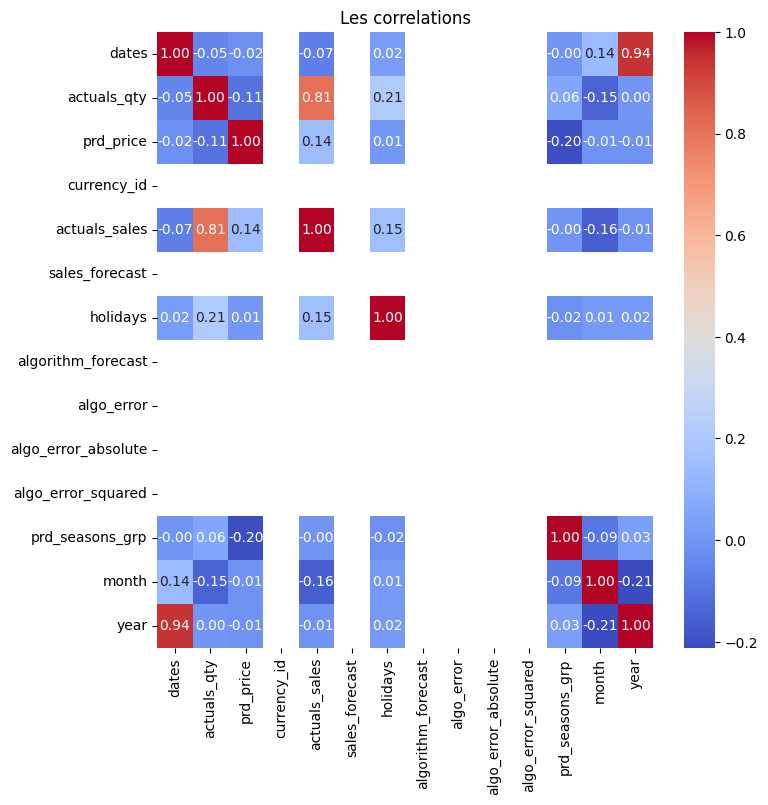

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df_features_info[var_num].corr()
plt.figure(figsize=(8, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt ="0.2f")
plt.title("Les correlations")
plt.show()